PART- 3 ( Handling With Outliers )

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("filled_autoscout.csv")

In [3]:
df.head(2).T

,0,1
body_type,Sedans,Sedans
price_€,15770.000,14500.000
vat,VAT deductible,Price negotiable
km,56013.000,80000.000
hp_kW,66.000,141.000
type,Used,Used
previous_owners,2.000,1.000
warranty,0.000,0.000
make,Audi,Audi
model,A1,A1


In [5]:
def detect_outlier(col):
    print('column name : ',col)
    print("--"*20)
    Q1 = df[col].quantile(0.25)
    print("Q1 : ", Q1)
    Q3 = df[col].quantile(0.75)
    print("Q3 : ", Q3)
    IQR = Q3 - Q1
    print("IQR : ", IQR )
    lower_lim = Q1 - 1.5*IQR
    print("lower limit : ", lower_lim)
    print("mean        : ", round(df[col].mean(), 2))
    upper_lim = Q3 +1.5*IQR
    print("upper limit : ", upper_lim)
    cnt_of_lower = (df[col] < lower_lim).sum()
    print("count of lower values : ", cnt_of_lower)
    cnt_of_upper = (df[col] > upper_lim).sum()
    print("count of upper values : ", cnt_of_upper)
    print(" ")
    print("the smallest 10 values :\n", df[col].sort_values().head(10))
    print(" ")
    print("the biggest 10 values :\n", df[col].sort_values(ascending = False).head(10))
    
    print("\n\n")

In [6]:
for i in df.select_dtypes(exclude="O").columns:
    detect_outlier(i)

column name :  price_€
----------------------------------------
Q1 :  12850.0
Q3 :  21900.0
IQR :  9050.0
lower limit :  -725.0
mean        :  18019.9
upper limit :  35475.0
count of lower values :  0
count of upper values :  479
 
the smallest 10 values :
 8594      13.000
8828     120.000
6066     255.000
8829     331.000
8827    4950.000
8825    4990.000
8826    5250.000
8824    5300.000
13770   5445.000
8823    5450.000
Name: price_€, dtype: float64
 
the biggest 10 values :
 3648    74600.000
15826   68320.000
3649    67600.000
3587    64900.000
15828   64332.000
15831   64298.000
3595    63900.000
15833   63477.000
3590    62900.000
3594    58990.000
Name: price_€, dtype: float64



column name :  km
----------------------------------------
Q1 :  2000.0
Q3 :  46898.5
IQR :  44898.5
lower limit :  -65347.75
mean        :  31964.85
upper limit :  114246.25
count of lower values :  0
count of upper values :  691
 
the smallest 10 values :
 14518   0.000
9892    0.000
2496    0.000
9

In [7]:
detect_outlier("price_€")

column name :  price_€
----------------------------------------
Q1 :  12850.0
Q3 :  21900.0
IQR :  9050.0
lower limit :  -725.0
mean        :  18019.9
upper limit :  35475.0
count of lower values :  0
count of upper values :  479
 
the smallest 10 values :
 8594      13.000
8828     120.000
6066     255.000
8829     331.000
8827    4950.000
8825    4990.000
8826    5250.000
8824    5300.000
13770   5445.000
8823    5450.000
Name: price_€, dtype: float64
 
the biggest 10 values :
 3648    74600.000
15826   68320.000
3649    67600.000
3587    64900.000
15828   64332.000
15831   64298.000
3595    63900.000
15833   63477.000
3590    62900.000
3594    58990.000
Name: price_€, dtype: float64





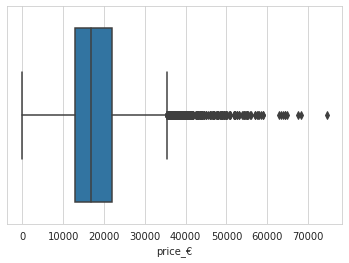

In [8]:
sns.boxplot(x="price_€", data=df);

In [10]:
detect_outlier("km")

column name :  km
----------------------------------------
Q1 :  2000.0
Q3 :  46898.5
IQR :  44898.5
lower limit :  -65347.75
mean        :  31964.85
upper limit :  114246.25
count of lower values :  0
count of upper values :  691
 
the smallest 10 values :
 14518   0.000
9892    0.000
2496    0.000
9882    0.000
15668   0.000
5553    0.000
12512   0.000
5672    0.000
9929    0.000
7828    0.000
Name: km, dtype: float64
 
the biggest 10 values :
 9279    317000.000
3003    291800.000
5712    260000.000
6224    248000.000
15277   240000.000
10804   232000.000
6380    231879.000
6062    230928.000
6399    229500.000
10495   222346.000
Name: km, dtype: float64





In [11]:
detect_outlier("hp_kW")

column name :  hp_kW
----------------------------------------
Q1 :  66.0
Q3 :  101.0
IQR :  35.0
lower limit :  13.5
mean        :  88.37
upper limit :  153.5
count of lower values :  22
count of upper values :  406
 
the smallest 10 values :
 6034   1.000
7019   1.000
7014   1.000
9285   1.000
6005   1.000
9287   1.000
9288   1.000
7018   1.000
9289   1.000
9290   1.000
Name: hp_kW, dtype: float64
 
the biggest 10 values :
 3595   294.000
3606   294.000
3587   294.000
3590   294.000
3592   294.000
3593   294.000
3596   294.000
3598   294.000
3599   294.000
3600   294.000
Name: hp_kW, dtype: float64





In [12]:
df.loc[df["hp_kW"].sort_values(ascending=True).head(50).index]

,body_type,price_€,vat,km,hp_kW,type,previous_owners,warranty,make,model,body_color,paint_type,upholstery,nr._of_doors,nr._of_seats,gearing_type,engine_displacement_cc,cylinders,weight_kg,drive_chain,fuel,co2e_g,emission_class,comfort&convenience,entertainment&media,extras,safety_&_security,gears,country_version,consumption_comb,consumption_city,consumption_country,age
6034,Station wagon,11600.000,VAT deductible,76010.000,1.000,Used,1.000,0.000,Opel,Astra,Silver,Metallic,NaN,5.000,5.000,Automatic,998.000,4.000,1393.000,front,Benzine,125.000,Euro 6,"Air conditioning,Electrical side mirrors,Leath...","Bluetooth,On-board computer,Radio,USB",NaN,"Alarm system,Central door lock,Driver-side air...",6.000,Unknown,6.440,8.300,5.300,2.000
7019,Sedans,11700.000,VAT deductible,69035.000,1.000,Used,1.000,0.000,Opel,Astra,Black,Metallic,NaN,5.000,5.000,Manual,1364.000,4.000,1308.000,front,Benzine,125.000,Euro 6,"Air conditioning,Automatic climate control,Cru...","CD player,Radio",NaN,"Driver-side airbag,Electronic stability contro...",6.000,Unknown,5.378,7.300,4.200,2.000
7014,Sedans,11700.000,VAT deductible,79993.000,1.000,Used,1.000,0.000,Opel,Astra,Silver,Metallic,NaN,5.000,5.000,Manual,1364.000,4.000,1308.000,front,Benzine,125.000,Euro 6,"Air conditioning,Automatic climate control,Cru...","CD player,Radio",NaN,"Driver-side airbag,Electronic stability contro...",6.000,Unknown,5.378,7.300,4.200,2.000
9285,Sedans,8300.000,Price negotiable,58912.000,1.000,Used,1.000,0.000,Opel,Corsa,Black,Metallic,NaN,5.000,5.000,Manual,1229.000,4.000,1163.000,front,Benzine,128.000,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,On-board computer,Radio,USB",NaN,"Alarm system,Central door lock,Driver-side air...",5.000,Unknown,5.398,6.700,4.600,2.000
6005,Station wagon,11600.000,VAT deductible,73860.000,1.000,Used,1.000,0.000,Opel,Astra,Black,Metallic,NaN,5.000,5.000,Automatic,998.000,4.000,1393.000,front,Benzine,125.000,Euro 6,"Air conditioning,Electrical side mirrors,Leath...","Bluetooth,On-board computer,Radio,USB",NaN,"Alarm system,Central door lock,Driver-side air...",6.000,Unknown,6.440,8.300,5.300,2.000
9287,Sedans,8300.000,Price negotiable,53522.000,1.000,Used,1.000,0.000,Opel,Corsa,Silver,Metallic,NaN,5.000,5.000,Manual,1229.000,4.000,1163.000,front,Benzine,128.000,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,On-board computer,Radio,USB",NaN,"Alarm system,Central door lock,Driver-side air...",5.000,Unknown,5.398,6.700,4.600,2.000
9288,Sedans,8300.000,Price negotiable,60386.000,1.000,Used,1.000,0.000,Opel,Corsa,Silver,Metallic,NaN,5.000,5.000,Manual,1229.000,4.000,1163.000,front,Benzine,128.000,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,On-board computer,Radio,USB",NaN,"Alarm system,Central door lock,Driver-side air...",5.000,Unknown,5.398,6.700,4.600,2.000
7018,Sedans,11700.000,VAT deductible,77272.000,1.000,Used,1.000,0.000,Opel,Astra,Black,Metallic,NaN,5.000,5.000,Manual,1364.000,4.000,1308.000,front,Benzine,125.000,Euro 6,"Air conditioning,Automatic climate control,Cru...","CD player,Radio",NaN,"Driver-side airbag,Electronic stability contro...",6.000,Unknown,5.378,7.300,4.200,2.000
9289,Sedans,8300.000,Price negotiable,59217.000,1.000,Used,1.000,0.000,Opel,Corsa,Silver,Metallic,NaN,5.000,5.000,Manual,1229.000,4.000,1163.000,front,Benzine,128.000,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,On-board computer,Radio,USB",NaN,"Alarm system,Central door lock,Driver-side air...",5.000,Unknown,5.398,6.700,4.600,2.000
9290,Sedans,8300.000,Price negotiable,51318.000,1.000,Used,1.000,0.000,Opel,Corsa,Silver,Metallic,NaN,5.000,5.000,Manual,1229.000,4.000,1163.000,front,Benzine,128.000,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,On-board computer,Radio,USB",NaN,"Alarm system,Central door lock,Driver-side air...",5.000,Unknown,5.398,6.700,4.600,2.000


In [13]:
df.loc[df["hp_kW"].sort_values(ascending=False).head(50).index]

,body_type,price_€,vat,km,hp_kW,type,previous_owners,warranty,make,model,body_color,paint_type,upholstery,nr._of_doors,nr._of_seats,gearing_type,engine_displacement_cc,cylinders,weight_kg,drive_chain,fuel,co2e_g,emission_class,comfort&convenience,entertainment&media,extras,safety_&_security,gears,country_version,consumption_comb,consumption_city,consumption_country,age
3595,Station wagon,63900.000,VAT deductible,10.000,294.000,Used,1.000,1.000,Audi,A3,Black,Metallic,Part leather,5.000,5.000,Semi-automatic,2480.000,5.000,1585.000,front,Benzine,189.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Shift paddles,Ski bag,Sport packa...","ABS,Adaptive Cruise Control,Adaptive headlight...",7.000,Italy,8.300,11.300,6.600,0.000
3606,Sedans,49900.000,VAT deductible,17234.000,294.000,Used,1.000,0.000,Audi,A3,Black,Metallic,NaN,5.000,5.000,Semi-automatic,2480.000,5.000,1585.000,front,Benzine,189.000,Euro 6,"Air conditioning,Seat ventilation,Split rear s...",Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central d...",7.000,Unknown,8.300,11.300,6.600,1.000
3587,Sedans,64900.000,VAT deductible,35000.000,294.000,Used,1.000,0.000,Audi,A3,Grey,Metallic,NaN,5.000,5.000,Semi-automatic,2480.000,5.000,1585.000,front,Benzine,189.000,Euro 6,"Air conditioning,Seat ventilation,Split rear s...",Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central d...",7.000,Unknown,8.300,11.300,6.600,1.000
3590,Sedans,62900.000,VAT deductible,700.000,294.000,Used,1.000,0.000,Audi,A3,Grey,Metallic,NaN,5.000,5.000,Semi-automatic,2480.000,5.000,1585.000,front,Benzine,194.000,Euro 6d-TEMP,"Air conditioning,Seat ventilation,Split rear s...","Bluetooth,Radio",Alloy wheels,"ABS,Adaptive Cruise Control,Alarm system,Centr...",7.000,Unknown,8.300,11.300,6.600,0.000
3592,Sedans,56900.000,VAT deductible,5200.000,294.000,Used,1.000,0.000,Audi,A3,Grey,Metallic,Full leather,5.000,5.000,Semi-automatic,2480.000,5.000,1585.000,4WD,Benzine,189.000,Euro 6,"Air conditioning,Air suspension,Armrest,Automa...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Shift paddles,Sport package,Sport...","ABS,Adaptive Cruise Control,Adaptive headlight...",7.000,Italy,8.300,11.300,6.600,1.000
3593,Sedans,58500.000,VAT deductible,10000.000,294.000,Used,1.000,0.000,Audi,A3,White,Metallic,NaN,5.000,5.000,Semi-automatic,2480.000,5.000,1585.000,front,Benzine,189.000,Euro 6,"Air conditioning,Seat ventilation,Split rear s...",Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central d...",7.000,Unknown,8.300,11.300,6.600,1.000
3596,Sedans,57400.000,Price negotiable,63000.000,294.000,Used,1.000,0.000,Audi,A3,Blue,Metallic,Full leather,5.000,5.000,Semi-automatic,2480.000,5.000,1585.000,4WD,Benzine,189.000,Euro 6,"Air conditioning,Air suspension,Armrest,Automa...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats,Sport suspension,Tune...","ABS,Adaptive Cruise Control,Adaptive headlight...",7.000,Unknown,8.300,11.300,6.600,1.000
3598,Sedans,55000.000,VAT deductible,24000.000,294.000,Used,1.000,0.000,Audi,A3,Black,Metallic,NaN,5.000,5.000,Semi-automatic,2480.000,5.000,1585.000,front,Benzine,189.000,Euro 6,"Air conditioning,Seat ventilation,Split rear s...",Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central d...",7.000,Unknown,8.300,11.300,6.600,2.000
3599,Sedans,55000.000,VAT deductible,30000.000,294.000,Used,1.000,0.000,Audi,A3,Grey,Metallic,NaN,4.000,5.000,Semi-automatic,2480.000,5.000,1590.000,front,Benzine,188.000,Euro 6,"Air conditioning,Seat ventilation,Split rear s...",Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central d...",7.000,Unknown,8.300,11.300,6.500,1.000
3600,Sedans,53000.000,VAT deductible,4000.000,294.000,Used,1.000,0.000,Audi,A3,Black,Metallic,NaN,4.000,5.000,Semi-automatic,2480.000,5.000,1590.000,front,Benzine,188.000,Euro 6,"Air conditioning,Air suspension,Armrest,Automa...","Bluetooth,CD player,Digital radio,Hand

In [14]:
df.groupby(["make", "model", "body_type"])["hp_kW"].mean()

make     model     body_type    
Audi     A1        Compact          77.078
                   Coupe            77.500
                   Other            80.385
                   Sedans           76.322
                   Station wagon    75.143
                   Van             147.000
         A2        Off-Road         85.000
         A3        Compact          89.945
                   Convertible     124.250
                   Coupe            82.000
                   Other            88.188
                   Sedans           90.077
                   Station wagon    90.681
Opel     Astra     Compact          87.849
                   Coupe           106.500
                   Off-Road        110.000
                   Other            86.403
                   Sedans           90.335
                   Station wagon    95.689
         Corsa     Compact          61.700
                   Coupe            59.462
                   Off-Road         68.667
                   Ot

In [15]:
df[df["hp_kW"] < 33.0][["make", "model"]].value_counts()

make     model   
Opel     Astra       7
         Corsa       7
         Insignia    4
Renault  Espace      2
Audi     A3          1
Renault  Clio        1
dtype: int64

In [16]:
df[df["hp_kW"] > 195][["make", "model"]].value_counts()

make  model   
Audi  A3          22
Opel  Insignia     1
dtype: int64

In [18]:
detect_outlier("previous_owners")

column name :  previous_owners
----------------------------------------
Q1 :  1.0
Q3 :  1.0
IQR :  0.0
lower limit :  1.0
mean        :  0.95
upper limit :  1.0
count of lower values :  1659
count of upper values :  797
 
the smallest 10 values :
 2295    0.000
1697    0.000
12697   0.000
12696   0.000
12694   0.000
12693   0.000
12692   0.000
12691   0.000
12690   0.000
12689   0.000
Name: previous_owners, dtype: float64
 
the biggest 10 values :
 15256   4.000
972     4.000
14994   3.000
9478    3.000
10770   3.000
13560   3.000
1290    3.000
11443   3.000
13568   3.000
15007   3.000
Name: previous_owners, dtype: float64





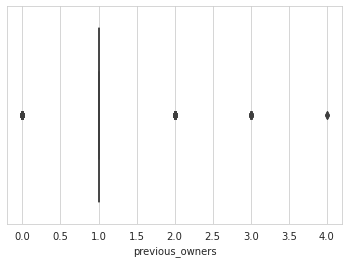

In [19]:
sns.boxplot(x=df.previous_owners);

In [20]:
detect_outlier("warranty")

column name :  warranty
----------------------------------------
Q1 :  0.0
Q3 :  1.0
IQR :  1.0
lower limit :  -1.5
mean        :  0.3
upper limit :  2.5
count of lower values :  0
count of upper values :  0
 
the smallest 10 values :
 0      0.000
9659   0.000
9660   0.000
9661   0.000
9662   0.000
9663   0.000
9664   0.000
9665   0.000
9666   0.000
9667   0.000
Name: warranty, dtype: float64
 
the biggest 10 values :
 7959    1.000
12349   1.000
5174    1.000
5173    1.000
5171    1.000
5169    1.000
12343   1.000
5166    1.000
12346   1.000
5161    1.000
Name: warranty, dtype: float64





In [21]:
detect_outlier("nr._of_doors")

column name :  nr._of_doors
----------------------------------------
Q1 :  4.0
Q3 :  5.0
IQR :  1.0
lower limit :  2.5
mean        :  4.66
upper limit :  6.5
count of lower values :  220
count of upper values :  1
 
the smallest 10 values :
 13782   1.000
1811    2.000
1228    2.000
1229    2.000
1230    2.000
1231    2.000
303     2.000
1233    2.000
1234    2.000
1235    2.000
Name: nr._of_doors, dtype: float64
 
the biggest 10 values :
 15202   7.000
0       5.000
10023   5.000
10012   5.000
10013   5.000
10014   5.000
10015   5.000
10016   5.000
10017   5.000
10018   5.000
Name: nr._of_doors, dtype: float64





In [22]:
detect_outlier("nr._of_seats")

column name :  nr._of_seats
----------------------------------------
Q1 :  5.0
Q3 :  5.0
IQR :  0.0
lower limit :  5.0
mean        :  4.95
upper limit :  5.0
count of lower values :  1242
count of upper values :  364
 
the smallest 10 values :
 14555   2.000
13931   2.000
13618   2.000
13743   2.000
13929   2.000
13617   2.000
13616   2.000
13749   2.000
13750   2.000
13619   2.000
Name: nr._of_seats, dtype: float64
 
the biggest 10 values :
 15125   7.000
15274   7.000
15010   7.000
15011   7.000
15012   7.000
15656   7.000
15657   7.000
15013   7.000
15014   7.000
15660   7.000
Name: nr._of_seats, dtype: float64





In [23]:
df[df["nr._of_seats"] == 2][["make", "model", "body_type"]].value_counts()

make     model     body_type    
Renault  Clio      Sedans           71
                   Transporter      26
                   Compact           8
Opel     Corsa     Transporter       4
Renault  Clio      Other             4
Opel     Corsa     Coupe             1
         Insignia  Station wagon     1
Renault  Clio      Van               1
dtype: int64

In [24]:
detect_outlier("engine_displacement_cc")

column name :  engine_displacement_cc
----------------------------------------
Q1 :  1229.0
Q3 :  1598.0
IQR :  369.0
lower limit :  675.5
mean        :  1424.82
upper limit :  2151.5
count of lower values :  51
count of upper values :  23
 
the smallest 10 values :
 14315   1.000
12473   1.000
12484   1.000
14328   1.000
14327   1.000
14326   1.000
13904   1.000
14325   1.000
14324   1.000
14322   1.000
Name: engine_displacement_cc, dtype: float64
 
the biggest 10 values :
 10932   16000.000
7169    15898.000
10771    2967.000
3609     2480.000
3604     2480.000
3602     2480.000
3601     2480.000
3600     2480.000
3599     2480.000
3598     2480.000
Name: engine_displacement_cc, dtype: float64





In [25]:
detect_outlier("engine_displacement_cc")

column name :  engine_displacement_cc
----------------------------------------
Q1 :  1229.0
Q3 :  1598.0
IQR :  369.0
lower limit :  675.5
mean        :  1424.82
upper limit :  2151.5
count of lower values :  51
count of upper values :  23
 
the smallest 10 values :
 14315   1.000
12473   1.000
12484   1.000
14328   1.000
14327   1.000
14326   1.000
13904   1.000
14325   1.000
14324   1.000
14322   1.000
Name: engine_displacement_cc, dtype: float64
 
the biggest 10 values :
 10932   16000.000
7169    15898.000
10771    2967.000
3609     2480.000
3604     2480.000
3602     2480.000
3601     2480.000
3600     2480.000
3599     2480.000
3598     2480.000
Name: engine_displacement_cc, dtype: float64





In [26]:
detect_outlier("engine_displacement_cc")

column name :  engine_displacement_cc
----------------------------------------
Q1 :  1229.0
Q3 :  1598.0
IQR :  369.0
lower limit :  675.5
mean        :  1424.82
upper limit :  2151.5
count of lower values :  51
count of upper values :  23
 
the smallest 10 values :
 14315   1.000
12473   1.000
12484   1.000
14328   1.000
14327   1.000
14326   1.000
13904   1.000
14325   1.000
14324   1.000
14322   1.000
Name: engine_displacement_cc, dtype: float64
 
the biggest 10 values :
 10932   16000.000
7169    15898.000
10771    2967.000
3609     2480.000
3604     2480.000
3602     2480.000
3601     2480.000
3600     2480.000
3599     2480.000
3598     2480.000
Name: engine_displacement_cc, dtype: float64





In [27]:
detect_outlier("cylinders")

column name :  cylinders
----------------------------------------
Q1 :  4.0
Q3 :  4.0
IQR :  0.0
lower limit :  4.0
mean        :  3.79
upper limit :  4.0
count of lower values :  3328
count of upper values :  32
 
the smallest 10 values :
 9956    1.000
15835   2.000
11342   2.000
0       3.000
2544    3.000
2545    3.000
2546    3.000
2547    3.000
2548    3.000
2549    3.000
Name: cylinders, dtype: float64
 
the biggest 10 values :
 15151   8.000
15197   8.000
15186   8.000
14989   8.000
535     8.000
15165   8.000
15055   8.000
10771   6.000
10826   6.000
12897   6.000
Name: cylinders, dtype: float64





In [28]:
detect_outlier("cylinders")

column name :  cylinders
----------------------------------------
Q1 :  4.0
Q3 :  4.0
IQR :  0.0
lower limit :  4.0
mean        :  3.79
upper limit :  4.0
count of lower values :  3328
count of upper values :  32
 
the smallest 10 values :
 9956    1.000
15835   2.000
11342   2.000
0       3.000
2544    3.000
2545    3.000
2546    3.000
2547    3.000
2548    3.000
2549    3.000
Name: cylinders, dtype: float64
 
the biggest 10 values :
 15151   8.000
15197   8.000
15186   8.000
14989   8.000
535     8.000
15165   8.000
15055   8.000
10771   6.000
10826   6.000
12897   6.000
Name: cylinders, dtype: float64





In [29]:

detect_outlier("weight_kg")

column name :  weight_kg
----------------------------------------
Q1 :  1180.0
Q3 :  1472.0
IQR :  292.0
lower limit :  742.0
mean        :  1345.4
upper limit :  1910.0
count of lower values :  3
count of upper values :  89
 
the smallest 10 values :
 12779     1.000
8355      1.000
1143    102.000
8857    840.000
14313   900.000
13555   977.000
13513   977.000
13937   980.000
14105   980.000
13996   980.000
Name: weight_kg, dtype: float64
 
the biggest 10 values :
 15678   2471.000
15185   2471.000
15231   2471.000
14975   2471.000
15280   2471.000
10646   2450.000
10638   2450.000
15133   2410.000
15136   2410.000
15143   2410.000
Name: weight_kg, dtype: float64





In [30]:

detect_outlier("weight_kg")

column name :  weight_kg
----------------------------------------
Q1 :  1180.0
Q3 :  1472.0
IQR :  292.0
lower limit :  742.0
mean        :  1345.4
upper limit :  1910.0
count of lower values :  3
count of upper values :  89
 
the smallest 10 values :
 12779     1.000
8355      1.000
1143    102.000
8857    840.000
14313   900.000
13555   977.000
13513   977.000
13937   980.000
14105   980.000
13996   980.000
Name: weight_kg, dtype: float64
 
the biggest 10 values :
 15678   2471.000
15185   2471.000
15231   2471.000
14975   2471.000
15280   2471.000
10646   2450.000
10638   2450.000
15133   2410.000
15136   2410.000
15143   2410.000
Name: weight_kg, dtype: float64





In [31]:
detect_outlier("co2e_g")

column name :  co2e_g
----------------------------------------
Q1 :  104.0
Q3 :  128.0
IQR :  24.0
lower limit :  68.0
mean        :  122.68
upper limit :  164.0
count of lower values :  7
count of upper values :  247
 
the smallest 10 values :
 8110    14.000
3617    36.000
3615    36.000
3612    36.000
3356    36.000
12547   45.000
9798    51.000
7857    80.000
13668   82.000
8912    82.000
Name: co2e_g, dtype: float64
 
the biggest 10 values :
 11888   14457.000
12343   13983.000
8542    12324.000
6578    12087.000
6579    12087.000
5818    12087.000
4089     1060.000
4556      990.000
535       331.000
10513     253.000
Name: co2e_g, dtype: float64





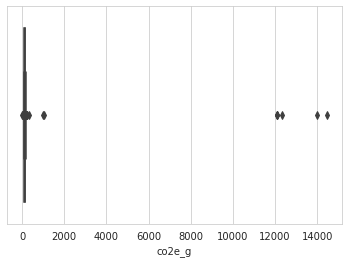

In [32]:
sns.boxplot(df.co2e_g);

In [33]:
detect_outlier("gears")

column name :  gears
----------------------------------------
Q1 :  5.0
Q3 :  6.0
IQR :  1.0
lower limit :  3.5
mean        :  5.94
upper limit :  7.5
count of lower values :  6
count of upper values :  300
 
the smallest 10 values :
 14375   1.000
8921    1.000
9812    2.000
15817   3.000
15845   3.000
15846   3.000
15823   4.000
15822   4.000
10287   5.000
10288   5.000
Name: gears, dtype: float64
 
the biggest 10 values :
 14495   50.000
15830    9.000
15827    9.000
15876    9.000
15814    9.000
15813    9.000
15812    9.000
15869    9.000
15824    9.000
15829    9.000
Name: gears, dtype: float64





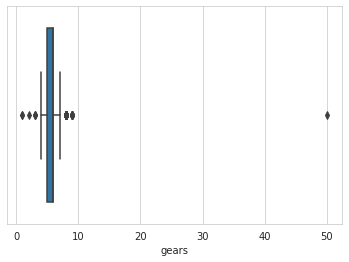

In [34]:
sns.boxplot(df.gears);

In [35]:
df.loc[df.gears == 50, "gears"] = 5

In [36]:
df.loc[df.gears <= 4, "gears"] = np.nan

In [37]:
df["gears"] = df.groupby(["make", "model", "body_type"])["gears"].apply(lambda x : x.fillna(x.mode()[0]))


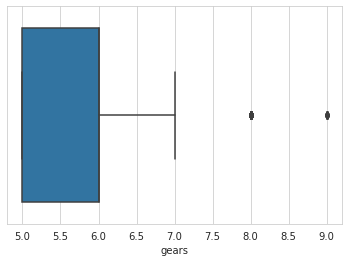

In [38]:
sns.boxplot(df.gears);

In [39]:
df.drop(columns=["consumption_city", "consumption_country"], inplace=True)

In [40]:
detect_outlier("consumption_comb")

column name :  consumption_comb
----------------------------------------
Q1 :  4.1
Q3 :  5.4
IQR :  1.3000000000000007
lower limit :  2.1499999999999986
mean        :  4.83
upper limit :  7.350000000000001
count of lower values :  4
count of upper values :  130
 
the smallest 10 values :
 13678   1.200
3615    1.600
3617    1.600
3612    1.600
8872    3.100
8904    3.100
8874    3.100
8566    3.100
8912    3.100
13680   3.100
Name: consumption_comb, dtype: float64
 
the biggest 10 values :
 535     13.800
10513    9.714
10771    9.100
12529    8.700
10817    8.700
10819    8.700
12054    8.700
12530    8.600
10789    8.600
12422    8.600
Name: consumption_comb, dtype: float64





In [41]:
df.iloc[[13678, 3615, 3617, 3612, 535, 10513, 10771]]

,body_type,price_€,vat,km,hp_kW,type,previous_owners,warranty,make,model,body_color,paint_type,upholstery,nr._of_doors,nr._of_seats,gearing_type,engine_displacement_cc,cylinders,weight_kg,drive_chain,fuel,co2e_g,emission_class,comfort&convenience,entertainment&media,extras,safety_&_security,gears,country_version,consumption_comb,age
13678,Off-Road,7700.000,VAT deductible,95000.000,55.000,Used,1.000,1.000,Renault,Clio,White,Metallic,Cloth,5.000,5.000,Manual,1461.000,4.000,1162.000,front,Diesel,85.000,Euro 6,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,CD player,Digital radio,Hands-free e...","Catalytic Converter,Sport package,Sport seats,...","ABS,Adaptive Cruise Control,Alarm system,Centr...",5.000,Italy,1.200,3.000
3615,Sedans,35899.000,VAT deductible,20880.000,110.000,Used,1.000,0.000,Audi,A3,White,Metallic,NaN,5.000,5.000,Semi-automatic,1395.000,4.000,1615.000,front,Electric,36.000,Euro 6,"Air conditioning,Power windows,Seat ventilatio...","Bluetooth,Radio",Alloy wheels,"ABS,Adaptive Cruise Control,Alarm system,Centr...",6.000,Unknown,1.600,1.000
3617,Sedans,38000.000,Price negotiable,12000.000,110.000,Used,1.000,0.000,Audi,A3,Grey,Metallic,Part leather,5.000,5.000,Semi-automatic,1395.000,4.000,1615.000,front,Electric,36.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Shift paddles,Sport package,Sport...","ABS,Adaptive Cruise Control,Adaptive headlight...",6.000,Unknown,1.600,1.000
3612,Sedans,38450.000,Price negotiable,13800.000,110.000,Used,1.000,0.000,Audi,A3,Black,Metallic,Cloth,5.000,5.000,Semi-automatic,1395.000,4.000,1615.000,front,Electric,36.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Sport package,Sport seats,Voice C...","ABS,Adaptive Cruise Control,Alarm system,Centr...",6.000,Unknown,1.600,1.000
535,Compact,12990.000,VAT deductible,41200.000,70.000,Used,1.000,0.000,Audi,A1,Silver,Metallic,Cloth,5.000,5.000,Manual,999.000,8.000,1180.000,front,Benzine,331.000,Euro 4,"Air conditioning,Automatic climate control,Ele...",NaN,"Ski bag,Sport suspension","ABS,Alarm system,Central door lock,Driver-side...",5.000,Unknown,13.800,3.000
10513,Station wagon,17990.000,VAT deductible,145000.000,239.000,Used,1.000,0.000,Opel,Insignia,Red,Metallic,Full leather,4.000,5.000,Automatic,1598.000,4.000,1623.000,4WD,Benzine,253.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Roof rack,Shift paddles,Sport pac...","ABS,Adaptive Cruise Control,Blind spot monitor...",6.000,Germany,9.714,3.000
10771,Station wagon,12000.000,Price negotiable,185000.000,100.000,Used,1.000,0.000,Opel,Insignia,White,Metallic,NaN,5.000,5.000,Automatic,2967.000,6.000,2295.000,front,Diesel,239.000,Euro 4,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Catalytic Converter,Roof rack,Ski...","ABS,Adaptive Cruise Control,Adaptive headlight...",6.000,Unknown,9.100,3.000


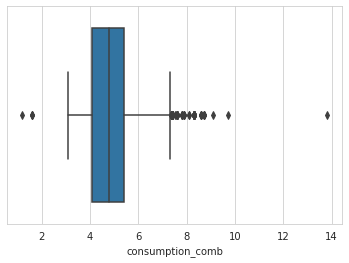

In [42]:
sns.boxplot(df.consumption_comb);

In [43]:
df.groupby(["make", "model", "body_type"])["consumption_comb"].median()

make     model     body_type    
Audi     A1        Compact         4.400
                   Coupe           3.802
                   Other           4.800
                   Sedans          4.200
                   Station wagon   4.200
                   Van             5.074
         A2        Off-Road        4.900
         A3        Compact         4.100
                   Convertible     4.800
                   Coupe           3.900
                   Other           4.150
                   Sedans          4.032
                   Station wagon   4.500
Opel     Astra     Compact         4.300
                   Coupe           6.200
                   Off-Road        5.600
                   Other           4.294
                   Sedans          4.800
                   Station wagon   4.500
         Corsa     Compact         5.600
                   Coupe           5.300
                   Off-Road        5.200
                   Other           5.200
                   Sedan

In [44]:
df.consumption_comb.iloc[[13678]] = 3.35


In [45]:
df.consumption_comb.iloc[[535]] = 4.400

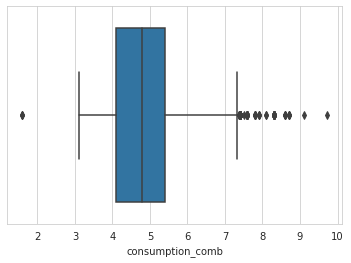

In [46]:
sns.boxplot(df.consumption_comb);

In [47]:
detect_outlier("age")

column name :  age
----------------------------------------
Q1 :  0.0
Q3 :  2.0
IQR :  2.0
lower limit :  -3.0
mean        :  1.39
upper limit :  5.0
count of lower values :  0
count of upper values :  0
 
the smallest 10 values :
 7959   0.000
7936   0.000
7935   0.000
7934   0.000
7933   0.000
7932   0.000
7931   0.000
7930   0.000
7929   0.000
7928   0.000
Name: age, dtype: float64
 
the biggest 10 values :
 0      3.000
5938   3.000
5955   3.000
5954   3.000
5953   3.000
5952   3.000
5950   3.000
5949   3.000
5947   3.000
5940   3.000
Name: age, dtype: float64





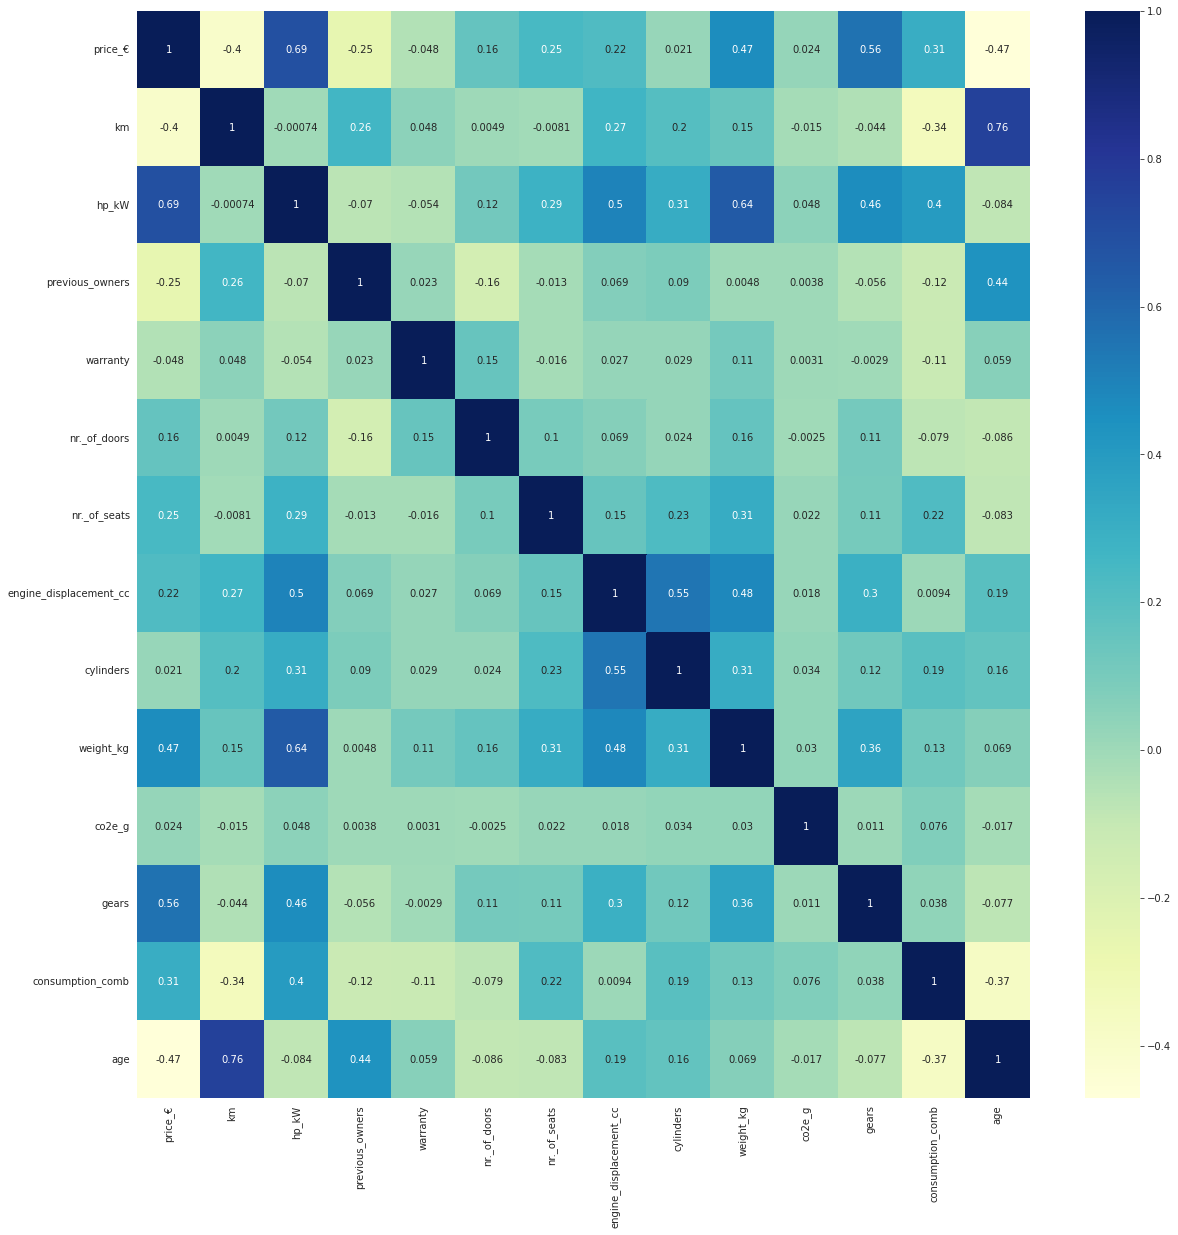

In [48]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu");

In [49]:
df.to_csv("no_outliers_aoutoscout.csv", index=False)